In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Import Dataset of Iris from sickit-Learn
from sklearn.datasets import load_iris


In [4]:
# Decision Tree related sk-learn imports
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [5]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score

## Loading data from the Code Veda Technologies given dataset of Iris

In [19]:
df = pd.read_csv("DecisionTree-iris.csv") # This is the dataset given by CodeVeda for Internship task. I have named as Decision tree for my reference

In [20]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [22]:
df.species.value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [24]:
from sklearn.preprocessing import OneHotEncoder

# Assuming 'df' is your DataFrame
encoder = OneHotEncoder(sparse_output=False)

# Extract and encode the 'species' column
encoded_species = encoder.fit_transform(df[['species']])

# Create a DataFrame with encoded column names
encoded_df = pd.DataFrame(encoded_species, columns=encoder.get_feature_names_out(['species']))

# Concatenate with original DataFrame (excluding the original species column)
df_final = pd.concat([df.drop('species', axis=1), encoded_df], axis=1)

print(df_final.head())


   sepal_length  sepal_width  petal_length  petal_width  species_setosa  \
0           5.1          3.5           1.4          0.2             1.0   
1           4.9          3.0           1.4          0.2             1.0   
2           4.7          3.2           1.3          0.2             1.0   
3           4.6          3.1           1.5          0.2             1.0   
4           5.0          3.6           1.4          0.2             1.0   

   species_versicolor  species_virginica  
0                 0.0                0.0  
1                 0.0                0.0  
2                 0.0                0.0  
3                 0.0                0.0  
4                 0.0                0.0  


### Loading IRIS the Dataset using Scikit Learn.

Here I am using IRIS dataset from scikit-learn

In [25]:
data = load_iris()
dfs = pd.DataFrame(data.data, columns = data.feature_names)
dfs['target'] = data.target
dfs.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [26]:
dfs

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


**Insight**
By Looking at the target data, the target is one-hot encoded as 0, 1, 2. which are 

In [27]:
dfs['target'].value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

### Reading the Dataset and getting some knowledge about the targets and feature values etc.

In [28]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [29]:
print(f"Feature Column Names are :  {data.feature_names}")
print(f"Target Names are :  {data.target_names}")

Feature Column Names are :  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target Names are :  ['setosa' 'versicolor' 'virginica']


In [30]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [ ]:
X = dfs[['sepal length (cm)',
        'sepal width (cm)',
        'petal length (cm)',
        'petal width (cm)']].values

In [32]:
X.shape

(150, 4)

In [34]:
y = dfs['target'].values

In [35]:
y = y.reshape(-1,1)

In [36]:
y.shape

(150, 1)

1. Train the model on the entire dataset
2. Test the model on the same dataset and evaluate how well we did by comparing the predicted response values with the true response values

### Build Model and Make Predictions

## Train Test Splitting the data for Decision Tree model building

In [45]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [47]:
print(f"X shape: {X.shape}")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y shape: {y.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X shape: (150, 4)
X_train shape: (120, 4)
X_test shape: (30, 4)
y shape: (150, 1)
y_train shape: (120, 1)
y_test shape: (30, 1)


## Build Model and Make Predictions

In [49]:
clf = DecisionTreeClassifier(max_depth=3, random_state=0)
# Train the model on the training data

clf.fit(X_train, y_train)
# Make predictions on the test data
predictions = clf.predict(X_test)

### Measure model performance Using below Metrix
- precision
- Recall
- F1 Score
- ROC Curve

In [50]:
# calculate the Classification accuracy
score = clf.score(X_test, y_test)
print("Accuracy Score: {0}".format(score))

Accuracy Score: 0.9666666666666667


Advantages of Train/Test Split : Fast, Simple, computationally inexpensive

### K-Folds Cross-Validation

In [53]:

kf = KFold(n_splits=5, shuffle=True, random_state=0)
# Initialize the Decision Tree Classifier
accuracy_scores = []
n=0
print("~~~~~ Cross Validation for each fold ~~~~~")
for train_index, test_index in kf.split(X, y):
    clf = DecisionTreeClassifier(max_depth=3, random_state=0).fit(X[train_index], y[train_index])
    score = clf.score(X[test_index], y[test_index])
    accuracy_scores.append(score)
    print('Model: ', n+1)
    print('Accuracy: ', accuracy_scores[n])
    n += 1

~~~~~ Cross Validation for each fold ~~~~~
Model:  1
Accuracy:  0.9666666666666667
Model:  2
Accuracy:  0.9
Model:  3
Accuracy:  1.0
Model:  4
Accuracy:  0.9666666666666667
Model:  5
Accuracy:  0.9333333333333333


In [54]:
print("Mean of Accuracy Scores: ", np.mean(accuracy_scores))

Mean of Accuracy Scores:  0.9533333333333334


In [55]:
cross_val_score(clf, X, y, cv=kf, scoring='accuracy').mean()

0.9533333333333334

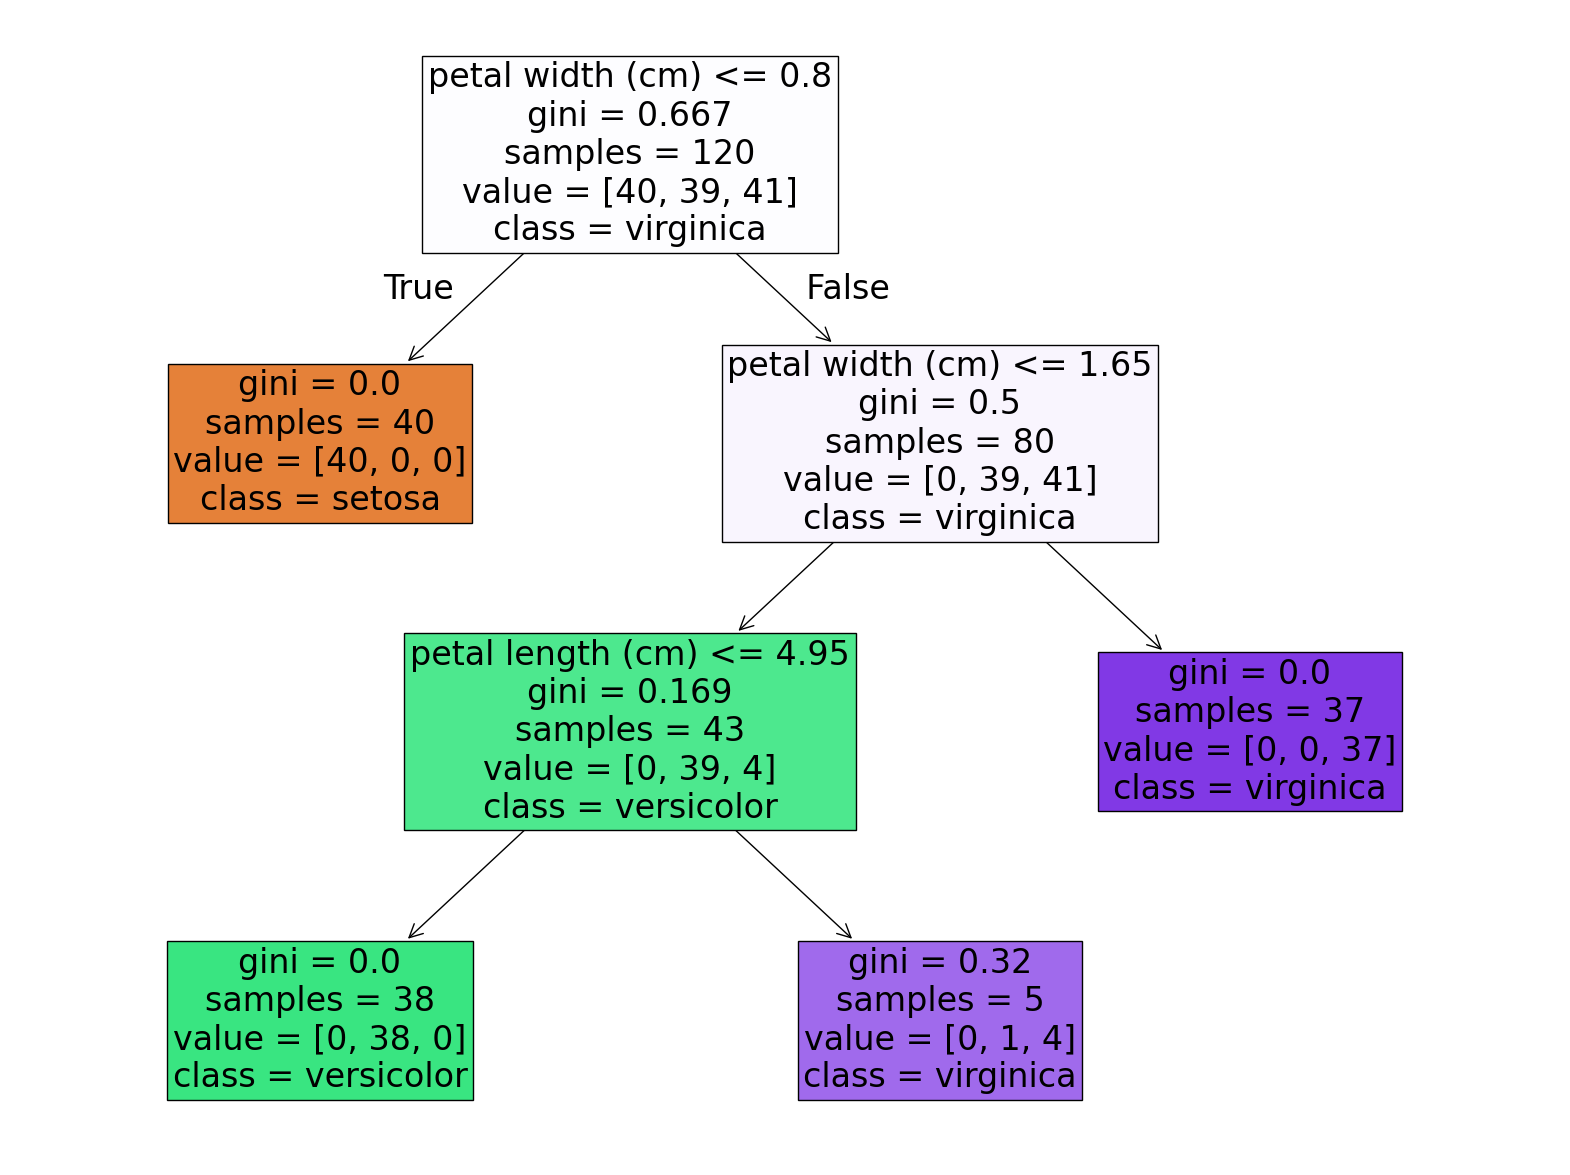

In [69]:
plt.figure(figsize=(20, 15))  # Increase the figure size
tree.plot_tree(clf, feature_names=data.feature_names, class_names=data.target_names, filled=True, fontsize=24)
plt.show()